# Simple Machine Learning for Style classification

### ...using Scikit-Learn (RFC, SVMs, Neural Networks, KNN, SGD)

### Import Packages :

In [1]:
# loading files
import pickle
import pandas as pd
import seaborn as sns
import os
import csv
# numpy
import numpy as np
from itertools import chain
# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# some libraries for result evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
# rendering values to input data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# My modules
from NetworkX_GraphTranslation import CentralityPoint2D as cepo
from NetworkX_GraphTranslation import getKeyByValue
from AutoHarmonicAnalysis import GraphOfNewPiece
from GraphTrajectoryClass import *

### Delcare Functions and Construct DATA

We create a dictionary with all the file Names, it's going to be implementated in a file later on (Note all the styles already categorized are below)

Load function and Create Dictionaries

In [2]:
def loadDict(file_name) :
    complete_name = 'Comparison_Results/GraphDictionaries_TrajectoryV1/' + file_name + '.dictionary'
    graphDict = pickle.load( open( complete_name, "rb" ) )
    return graphDict

In [3]:
def composerPointsDict(method) :
    scikit_datalist = 'scikit_datalist'
    dictOfComposerPoints_mix4 = dict()
    for composer, file_name in nameDict.items() :
        datalist = []
        for graph in loadDict(file_name).values() :
            x, y, z = cepo(graph, 3, method)
            datalist.append([[composer],[x, y, z]])
    datalist = np.array(datalist)
    pickle.dump( dictOfComposerPoints_mix4, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

### Store all data to an object

In [4]:
def composerClassGraphs() :
    scikit_datalist = 'scikit_datalist'
    datalist = []
    for composer, file_name in nameDict.items() :
        for graph in loadDict(file_name).values() :
            graphcls = GraphClass(graph)
            datalist.append([composer, graphcls])
    datalist = np.array(datalist)
    pickle.dump( datalist, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

In [5]:
def transformFilesFromDirToList(directory) :
    datalist = []
    for file in os.listdir(directory):
        if file.endswith(".p") :
            complete_name = directory + '/' + file
            print('Rendering --> ', file)
            datalist.append(pickle.load( open( complete_name, "rb" ) ))
    return datalist

In [6]:
def composerPointsDict2List(composerPointsDict) :
    nl = [['COMPOSER', 'Kaltz Centrality', 'Global Clustering', 'Square Clustering', 'STYLE', 'HARMONY']]
    for composer, points in composerPointsDict.items() :
        print([composer, len(points)])
        if composer == 'bach' or composer == 'monteverdi' :
            style = 'barok'
            harmony = 'modal'
        elif composer == 'palestrina' :
            style = 'medieval'
            harmony = 'modal'
        elif composer == 'jazz' :
            style = 'jazz'
            harmony = 'chromatic'
        elif composer == 'chopin' :
            style = 'classical'
            harmony = 'chomatic'
        else :
            style = 'classical'
            harmony = 'classic'
            
        if composer == 'palestrina' :
            for index, point in enumerate(points) :
                if index < 60 :
                    x, y, z = point
                    nl.append([composer, x, y, z])
#                     nl.append([composer, x, y, z, style, harmony])
        else : 
            for point in points :
                x, y, z = point
                nl.append([composer, x, y, z])
#                 nl.append([composer, x, y, z, style, harmony])
    return np.array(nl)

In [7]:
def graphList2values(graphList) :
    nl = [['Composer', 'Name', 'Style', 'Harmony', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']] #, 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']]
    for graph in graphList :
        nl.append([graph.composer, graph.name, graph.style, graph.harmony, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz])
    return np.array(nl)

In [15]:
def write2csv(directory, file_name,  data):
    directory = directory + '/' + file_name + '.csv'
    with open(directory, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(data)
    csvFile.close()

In [34]:
def graphsList2values(graphList) :
    nl1 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']]
    nl2 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']] 
    for graphs in graphList :
        graph, graphRec = graphs
        nl1.append([graph.composer, graph.name, graph.style, graph.trajectory.type, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz])
        nl2.append([graphRec.composer, graph.name, graphRec.style, graphRec.trajectory.type, graphRec.kalz_coef, graphRec.glob_clust_coef, graphRec.square_clustering_coef, graphRec.harmonic_coef, graphRec.betweenness_coef, graphRec.closeness_coef, graphRec.trajectory.Tonnetz])
    return np.array(nl1), np.array(nl2)

In [35]:
graphlist = transformFilesFromDirToList('Comparison_Results/GraphObjects_new')
graphList = []
for listOfGraphs in graphlist :
    graphList += listOfGraphs 
graphArray = np.array(graphList)

Rendering -->  bach.p
Rendering -->  beethoven.p
Rendering -->  beethovenCorpus.p
Rendering -->  chopin.p
Rendering -->  chopinCorpus.p
Rendering -->  jazz.p
Rendering -->  monteverdi.p
Rendering -->  mozart.p
Rendering -->  mozartCorpus.p
Rendering -->  palestrina.p
Rendering -->  schumann.p
Rendering -->  schumannCorpus.p


In [36]:
valueList1, valueList2 = graphsList2values(graphArray)

write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_future', valueList1)
write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_recursive', valueList2)

# Read Files - Begin { Prediction }

In [125]:
# data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_future.csv', sep = ',')
data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_recursive.csv', sep = ',')


In [126]:
data.head()

,Composer,Name,Style,Trajectory Type,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz
0,bach,NaN,barok,Recursive Trajectory,0.130059,0.270052,0.273197,13.753492,0.124047,0.055021,"[3, 4, 5]"
1,bach,NaN,barok,Recursive Trajectory,0.228586,0.166667,0.314765,12.633333,0.102571,0.170063,"[2, 3, 7]"
2,bach,NaN,barok,Recursive Trajectory,0.237982,0.304348,0.431645,12.116667,0.093578,0.210893,"[3, 4, 5]"
3,bach,NaN,barok,Recursive Trajectory,0.188872,0.302703,0.421619,14.194048,0.117390,0.128648,"[3, 4, 5]"
4,bach,NaN,barok,Recursive Trajectory,0.183944,0.178750,0.342802,14.821429,0.103933,0.128354,"[2, 3, 7]"


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 11 columns):
Composer                  501 non-null object
Name                      0 non-null float64
Style                     501 non-null object
Trajectory Type           501 non-null object
Kalz Centrality           501 non-null float64
Global Clustering         501 non-null float64
Square Clustering         501 non-null float64
Harmonic Centrality       501 non-null float64
Betweenness Centrality    501 non-null float64
Closeness Centrality      501 non-null float64
Tonnetz                   501 non-null object
dtypes: float64(7), object(4)
memory usage: 35.3+ KB


In [94]:
data.isnull().sum()

Composer                    0
Name                      501
Style                       0
Trajectory Type             0
Kalz Centrality             0
Global Clustering           0
Square Clustering           0
Harmonic Centrality         0
Betweenness Centrality      0
Closeness Centrality        0
Tonnetz                     0
dtype: int64

###  Data DROPING :

In [95]:
data = data.drop(columns='Name')
data = data.drop(columns='Style')
data = data.drop(columns='Trajectory Type')
# data = data.drop(columns='Harmony')
# data = data.drop(columns='Harmonic Centrality')
# data = data.drop(columns='Closeness Centrality')
# data = data.drop(columns='Betweenness Centrality')
# data = data.drop(columns='Global Clustering')

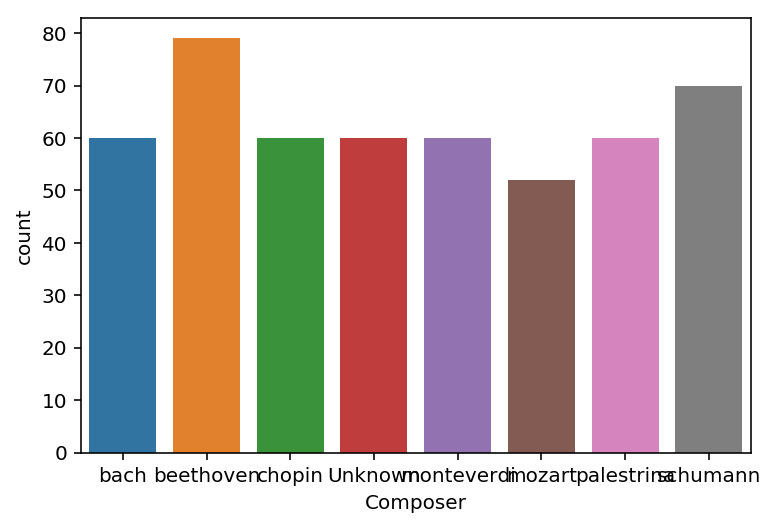

In [96]:
sns.countplot(data['Composer'])

### Encoding Labels (Enumerations)

In [97]:
label_quality = LabelEncoder()

In [98]:
# data['Name'] = label_quality.fit_transform(data['Name'])
# data['Style'] =  label_quality.fit_transform(data['Style'])
# data['Harmony'] =  label_quality.fit_transform(data['Hamrony'])
data['Tonnetz'] =  label_quality.fit_transform(data['Tonnetz'])
data['Composer'] =  label_quality.fit_transform(data['Composer'])

In [99]:
data.head()

,Composer,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz
0,1,0.130059,0.270052,0.273197,13.753492,0.124047,0.055021,4
1,1,0.228586,0.166667,0.314765,12.633333,0.102571,0.170063,3
2,1,0.237982,0.304348,0.431645,12.116667,0.093578,0.210893,4
3,1,0.188872,0.302703,0.421619,14.194048,0.117390,0.128648,4
4,1,0.183944,0.178750,0.342802,14.821429,0.103933,0.128354,3


In [100]:
data['Composer'].value_counts()

2    79
7    70
6    60
4    60
3    60
1    60
0    60
5    52
Name: Composer, dtype: int64

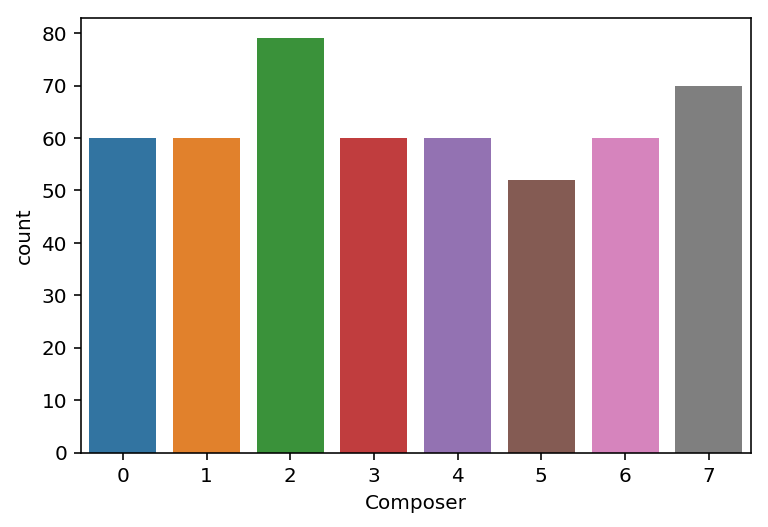

In [101]:
sns.countplot(data['Composer'])

Now lets separate the dataset as response variable and feature variables

In [102]:
X = data.drop('Composer', axis = 1)
y = data['Composer']

Train and TEst Splitting of Data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Applying standard Scalling

In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Random Forest Classifier

In [105]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Performance report :

In [106]:
print('\033[1m' + 'RANDOM FORREST CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_rfc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_rfc), '\n')

RANDOM FORREST CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.75      0.50      0.60        18
           1       0.60      0.56      0.58        16
           2       0.52      0.69      0.59        16
           3       0.26      0.40      0.32        15
           4       0.69      0.53      0.60        17
           5       0.00      0.00      0.00        12
           6       0.47      0.90      0.62        10
           7       0.28      0.23      0.25        22

   micro avg       0.46      0.46      0.46       126
   macro avg       0.45      0.48      0.45       126
weighted avg       0.46      0.46      0.45       126
 

Confusion Matrix : 

 [[ 9  0  1  4  0  1  0  3]
 [ 0  9  0  1  1  0  4  1]
 [ 1  0 11  3  0  0  0  1]
 [ 1  0  3  6  0  1  0  4]
 [ 0  3  0  0  9  0  4  1]
 [ 1  1  4  2  0  0  1  3]
 [ 0  0  0  1  0  0  9  0]
 [ 0  2  2  6  3  3  1  5]] 



In [107]:
label_quality.inverse_transform([7])

array(['schumann'], dtype=object)

## SVM Classifier

In [108]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [109]:
print('\033[1m' + 'SUPPORT VECTOR MACHINE : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_clf), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_clf), '\n')

SUPPORT VECTOR MACHINE : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.50      0.38      0.43        16
           2       0.39      0.75      0.51        16
           3       0.30      0.20      0.24        15
           4       0.78      0.41      0.54        17
           5       0.00      0.00      0.00        12
           6       0.23      0.80      0.36        10
           7       0.12      0.09      0.11        22

   micro avg       0.37      0.37      0.37       126
   macro avg       0.39      0.39      0.35       126
weighted avg       0.41      0.37      0.36       126
 

Confusion Matrix : 

 [[ 9  0  4  2  0  0  0  3]
 [ 0  6  0  0  1  0  9  0]
 [ 2  0 12  0  0  0  0  2]
 [ 0  0  5  3  0  0  2  5]
 [ 0  2  1  0  7  0  6  1]
 [ 0  1  5  2  0  0  1  3]
 [ 0  2  0  0  0  0  8  0]
 [ 0  1  4  3  1  2  9  2]] 



## Neural Network Classifier

In [110]:
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [111]:
print('\033[1m' + 'NEURAL NETWORK CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_mlpc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_mlpc), '\n')

NEURAL NETWORK CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.50      0.44      0.47        16
           2       0.38      0.56      0.45        16
           3       0.40      0.13      0.20        15
           4       0.85      0.65      0.73        17
           5       0.20      0.33      0.25        12
           6       0.26      0.50      0.34        10
           7       0.50      0.32      0.39        22

   micro avg       0.45      0.45      0.45       126
   macro avg       0.47      0.45      0.44       126
weighted avg       0.50      0.45      0.46       126
 

Confusion Matrix : 

 [[12  0  3  0  0  2  0  1]
 [ 0  7  0  1  0  0  6  2]
 [ 2  0  9  1  0  4  0  0]
 [ 1  1  4  2  0  6  0  1]
 [ 0  0  0  0 11  0  4  2]
 [ 2  1  4  0  0  4  1  0]
 [ 0  4  0  0  0  0  5  1]
 [ 0  1  4  1  2  4  3  7]] 



## Stochastic Gradient Descent

In [112]:
from sklearn.linear_model import SGDClassifier

In [113]:
sgd = SGDClassifier(loss="log", max_iter=500).fit(X, y)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)  

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [114]:
print('\033[1m' + 'STOCHASTIC GRADIENT DESCENT : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_sgd), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_sgd), '\n')
print('\033[1m' + 'Attribute Coefficients per Label : \n')
print('\033[0m', sgd.coef_)

STOCHASTIC GRADIENT DESCENT : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.00      0.00      0.00        16
           2       0.44      0.75      0.56        16
           3       0.33      0.27      0.30        15
           4       0.69      0.53      0.60        17
           5       0.50      0.08      0.14        12
           6       0.27      0.90      0.42        10
           7       0.29      0.27      0.28        22

   micro avg       0.43      0.43      0.43       126
   macro avg       0.41      0.44      0.38       126
weighted avg       0.41      0.43      0.39       126
 

Confusion Matrix : 

 [[13  0  2  1  0  0  0  2]
 [ 0  0  0  0  2  0 12  2]
 [ 2  0 12  1  0  0  0  1]
 [ 1  0  4  4  0  0  2  4]
 [ 0  0  0  2  9  0  4  2]
 [ 1  0  4  1  0  1  2  3]
 [ 0  0  0  0  0  0  9  1]
 [ 1  0  5  3  2  1  4  6]] 

Attribute Coefficients per Label : 

 [[-4.8955

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear and Non-Linear Regression

In [115]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LINEAR REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

LINEAR REGRESSION : 

Attribute Coefficients : 

 [ 0.12867686 -0.25357327  0.30815148 -0.74626068  0.0538097  -0.26141554
  0.25738557] 

Score : 

 0.13147124053775916


In [116]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LOGISTIC REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

LOGISTIC REGRESSION : 

Attribute Coefficients : 

 [[-0.96474494  0.56236051 -2.25523643  0.79223987  0.55504165  1.5745546
  -0.1980913 ]
 [ 0.87793954  0.30178981  0.00226035 -1.41526029  0.46251347 -0.6002128
  -0.22190789]
 [-1.50174075  0.1300222  -0.19355029 -0.29717029 -0.08567904 -0.73393308
   0.13753364]
 [ 0.17840079 -1.00908315  0.35737718  0.09143327 -0.07755291  0.10282835
   0.62673274]
 [-0.6848287   0.03334565  0.84159343 -1.91163637  0.06523335 -0.35107466
  -0.44376793]
 [-1.13729767 -0.36115986 -0.08122072 -0.56318506  0.08965379 -0.43256777
   0.14642338]
 [ 1.16024697  0.32489469 -0.26174103 -1.68901812  0.47234667 -0.8918835
   0.12263655]
 [-0.49329368 -0.28416308  0.09339826 -0.22039243  0.0606737   0.70547841
   0.49496488]] 

Score : 

 0.3968253968253968


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Nearest Centroid Classifier

In [117]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [118]:
ncc = NearestCentroid()
ncc.fit(X_train, y_train)
pred_ncc = ncc.predict(X_test)  

print('\033[1m' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_ncc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_ncc), '\n')

Classification Report : 

               precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.38      0.50      0.43        16
           2       0.50      0.38      0.43        16
           3       0.17      0.20      0.18        15
           4       0.62      0.29      0.40        17
           5       0.23      0.25      0.24        12
           6       0.29      0.50      0.37        10
           7       0.20      0.18      0.19        22

   micro avg       0.36      0.36      0.36       126
   macro avg       0.38      0.36      0.36       126
weighted avg       0.39      0.36      0.36       126
 

Confusion Matrix : 

 [[11  0  0  4  0  0  0  3]
 [ 0  8  0  0  1  0  5  2]
 [ 3  0  6  2  0  4  0  1]
 [ 1  0  2  3  1  4  0  4]
 [ 0  2  0  2  5  0  5  3]
 [ 1  1  1  3  0  3  1  2]
 [ 0  4  0  0  0  0  5  1]
 [ 1  6  3  4  1  2  1  4]] 



### Print Encoding of Composers

In [119]:
print('0 = ', label_quality.inverse_transform([0]))
print('1 = ', label_quality.inverse_transform([1]))
print('2 = ', label_quality.inverse_transform([2]))
print('3 = ', label_quality.inverse_transform([3]))
print('4 = ', label_quality.inverse_transform([4]))
print('5 = ', label_quality.inverse_transform([5]))
print('6 = ', label_quality.inverse_transform([6]))
print('7 = ', label_quality.inverse_transform([7]))

0 =  ['Unknown']
1 =  ['bach']
2 =  ['beethoven']
3 =  ['chopin']
4 =  ['monteverdi']
5 =  ['mozart']
6 =  ['palestrina']
7 =  ['schumann']


## Let's Plot some Stuff

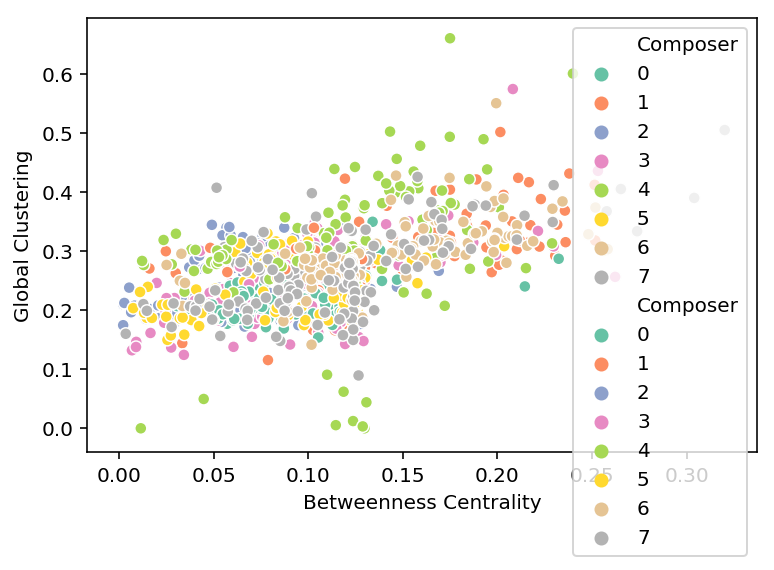

In [120]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Square Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

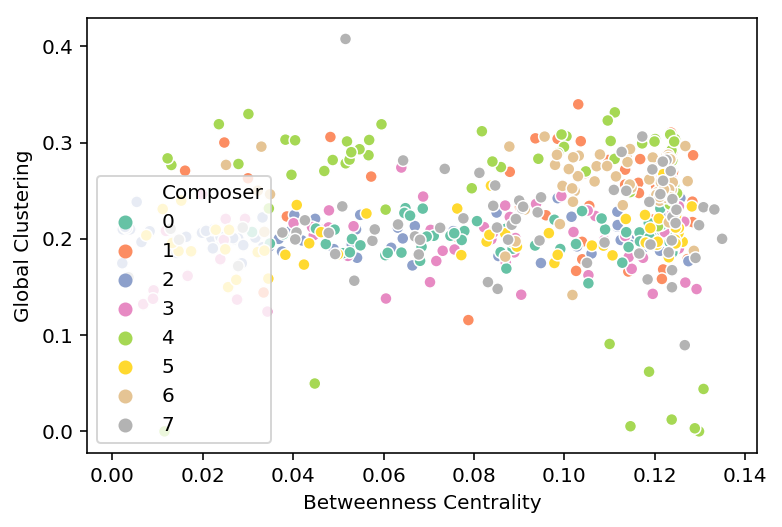

In [121]:
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

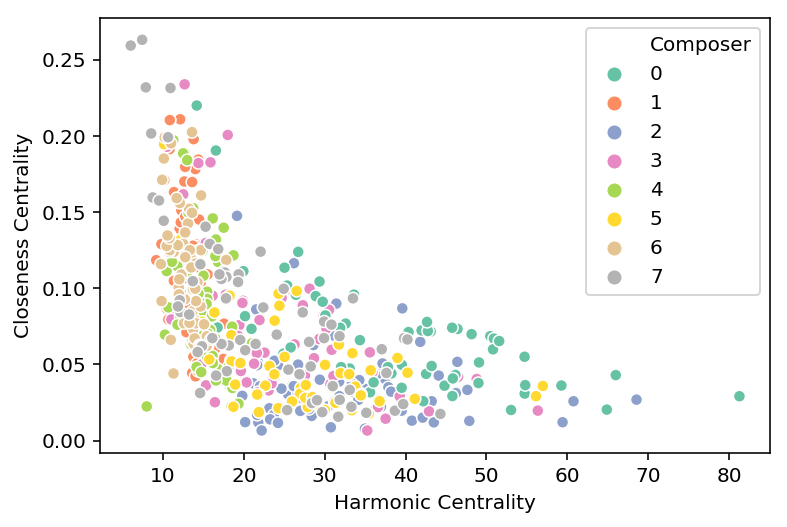

In [122]:
ax = sns.scatterplot(data['Harmonic Centrality'], data['Closeness Centrality'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

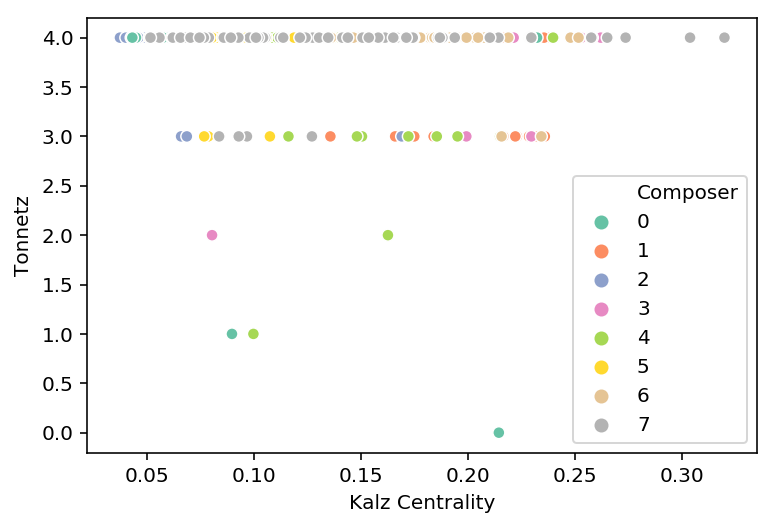

In [123]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Tonnetz'],  hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

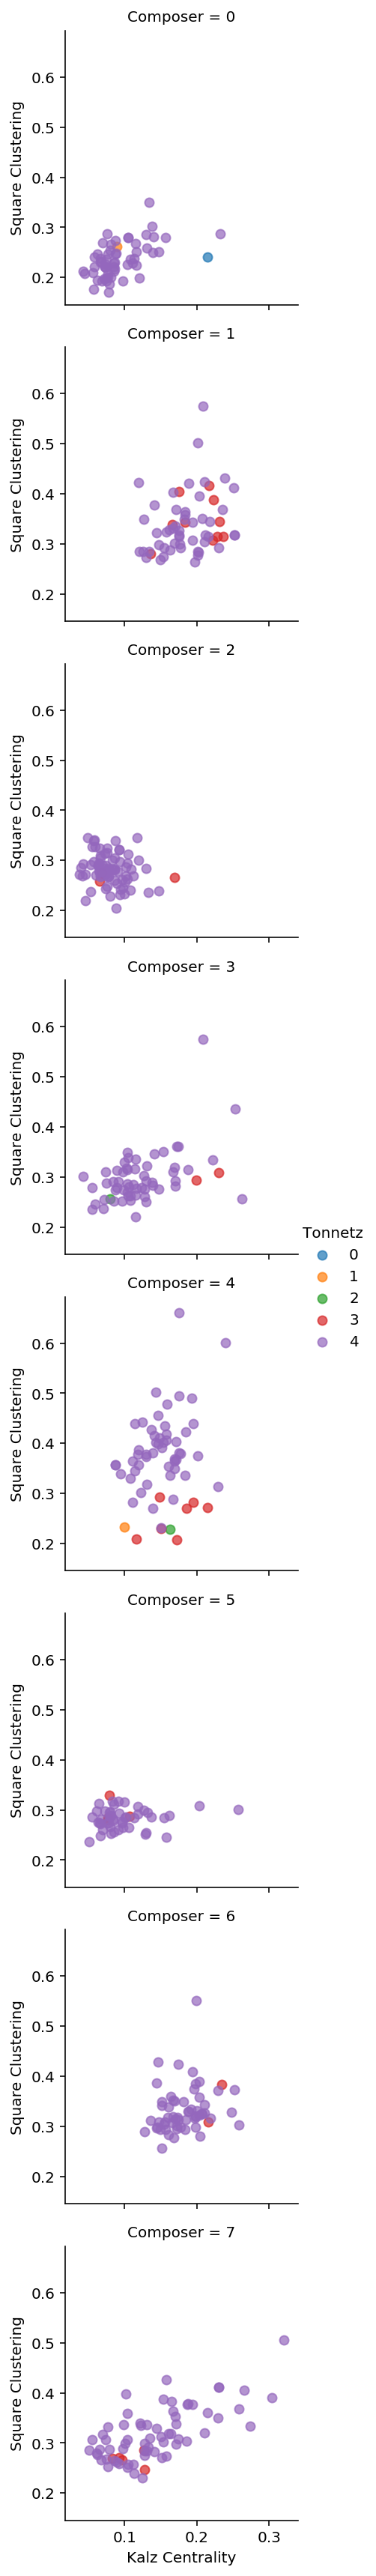

In [124]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, row='Composer', hue='Tonnetz')
g.map(plt.scatter, 'Kalz Centrality', 'Square Clustering', alpha=.7)
g.add_legend();